# COGS 118B - Final Project

# Adversarial AI Training with Multiplayer Tetris

## Group members

- Kendrick Nguyen
- Anh Tran
- Eric Song

# Abstract 

Multiplayer Tetris is an adversarial task with complex interactions inside individual game states in addition to complex interactions between the game states of the agents. Tetris is particularly complex because of its potentially infinite nature and because of strict rulesets that reward certain types of performance. Examples of this include T-Spins and doing a “Tetris” (four line clear). Our goal is to implement various reinforcement learning algorithms in order to train a model capable of not only playing Tetris, but also being able to play it in a competitive environment. Our first metric of performance will be survival duration and score (with predefined rules on how a score will be generated from clearing lines in the game). Then, our metric for adversarial tasks will include winning as well as comparisons such as score differential. 

# Background

Alexey Pajitnov invented the first playable version of Tetris in 1985 <a name="chip"></a>[<sup>[1]</sup>](#chip). This popular and classic game comes with fairly simple rules–there is a predetermined set of ways that the current piece can move and a predetermined set of interactions this piece can have with other pieces<a name="design"></a>[<sup>[4]</sup>](#design). Scoring is determined by combinations of pieces and the number of lines that are cleared<a name="design"></a>[<sup>[4]</sup>](#design).  Cleared lines (i.e. filled-in horizontal lines with pieces) disappear from the board. Together, these rules create this survival game where the player tries to keep stacking and clearing lines. The game ends when the height of the player's stack crosses a certain threshold or if no new pieces can spawn in without clipping existing pieces on the board <a name="tetriswiki"></a>[<sup>[3]</sup>](#tetriswiki). Because the game gravity speeds up and the pieces appear and drop faster and faster, it is impossible for a human player to play the game forever (in fact, this question on the feasible of infinite Tetris Games has even inspired research papers <a name="tetriswiki"></a>[<sup>[3]</sup>](#tetriswiki)). 

Using reinforcement learning to teach an AI how to play Tetris has been explored before. Papers such as the following: https://cs231n.stanford.edu/reports/2016/pdfs/121_Report.pdf and other projects such as this one: https://rex-l.medium.com/reinforcement-learning-on-tetris-707f75716c37 explore the implications of deep learning with neural networks and reinforcement learning algorithms on Tetris <a name="rl"></a>[<sup>[6]</sup>](#rl) <a name="medium"></a>[<sup>[5]</sup>](#medium). Perhaps these algorithms can overcome the human limitations on playing this classic game. In these projects, the authors played Tetris in a single-player mode where the objective is to stay alive and keep clearing pieces. Our project seeks to extend these previous works to a multiplayer environment. 

Since the development of the original Tetris game, countless new versions have been created with different objectives. Among these include games such as Tetris 99, where the objective is to not only stay alive, but to also send pieces to your opponents (these pieces are called “garbage”) <a name="tetris99"></a>[<sup>[2]</sup>](#tetris99). This adversarial-type task differs from the previous works where the agent only sought to stay alive. Our goal is that perhaps we will observe emergent behaviors from this process that emulate how players play in the wild. Perhaps we will see the AI learn to hold back pieces in order to create a large, overwhelming wave of garbage. Perhaps we will see more complex piece movement in order to chain combination attacks such as T-Spins. 

# Problem Statement

The scope of this project's goal is to develop an AI to optimally play and compete in a multi-player game of Tetris. Unlike the original Tetris game, multiplayer Tetris games, such as Tetris 99, presents the additional challenge of outlasting your opponent and delivering combos to inhibit your opponent’s survival. This project hopes to train an AI in a multiplayer Tetris game environment and in an adversarial manner. Training and progression of the AI occurs during a match against another AI agent where either agent is rewarded/penalized based on the victory and game score. Each agent will have their own model or algorithm to output their discrete in-game moves and hopefully to continue to refine after every match.

# Data

This project does not use a particular dataset but rather a live game environment to interact and train the AI agents. The data that our agents will ingest will be game-state data, such as the current configuration of the Tetris board, incoming Tetris pieces, game score or rewards, etc. Therefore, most of the game-state data will be dynamic (per game frame possibly).

Critical input data/variables (for each agent): Tetris board state, current Tetris piece, incoming Tetris piece, available actions, number of lines, uniformity/heights, and game score.

The Tetris game environment will be sourced from OpenAI Gym, providing only an interface. However, to immediately put our efforts in developing our AIs, we utilized a public repository that provides a wrapper for the Tetris environment, providing observation, states, actions, and info. https://github.com/tristanrussell/gym-simpletetris

# Proposed Solution

The project will be exploring various algorithms and techniques to teach the agents to play and compete in Tetris in an adversarial manner.

NeuroEvolution of Augmenting Topologies (NEAT): NEAT is a genetic algorithm-based technique for evolving neural networks, similarly inspired by human evolution or natural selection. The training will consist of a population of very simple AI agents that are paired with one and another. The paired agents will be trained adversarially, competing against each other. All paired agents across the population are evaluated on a criteria called the fitness which is determined based on their victory and score. The agent that wins within their respective pair will be chosen to play against other victorious agents (similar to a tournament bracket). The grand winner of population (or the most “fit”) will represent one training iteration and proceed to play another iteration against a new generation of agents. The training progresses by mutating and cross-overing (choosing the best parameters and characters) of the winning agent to create a new population. Thus, for every generation the previous winning agent will compete against other agents that are slightly better. To test performance of AI after X-generations, another victorious AI from a previous generation could be compared/competed against; alternatively, a brute force AI could be compared/competed against as well.

Q-Learning: A reinforcement algorithm that consists of either exploring new actions to learn more about the environment (exploration) or exploiting its current state to select actions that are known to yield high rewards (exploitation). It uses a Q-table to determine the next optimal action and reward, to transition to the next game-action it uses a general formula

$Q(s, a) ← Q(s, a) + α * [r + γ * max(Q(s', a')) - Q(s, a)]$

Where 

- s is the game-state
- a is the discrete action
- α (alpha) is the learning rate
- γ (gamma) is the discount factor

Training will occur in the similar manner as the NEAT algorithm where each agent contains their own Q-learning algorithm. To test performance of the AIs it would be compared/competed against the most refined AI or a brute-forced AI.

# Evaluation Metrics

The metrics that we will be using to test how well the AI performs its task of playing tetris against another AI opponent would be the scoring that it accumulates from stacking and creating a “line clear” for points. Additionally, by clearing a 2, 3, or 4 lines and “combo” consecutively, the points for would increase correspond to the “line clear” and “combo”. The crucial part of tetris playing with an opponent would be when “line clear” is achieved, “trash” would be generated on the opponent's side. The agent is to make optimized moves in which they play to “line clear” to keep on playing and stacking up “trash” on the opponent's side in order to make the opponent's game more difficult and end their game early. 

The reward for each move is to set up the pieces in order to create many chances to combos. The scoring for line clear is important but it ultimately matters more when “trash” is generated on the opponent’s side. Therefore, setting up the board to do 4 stack line clears or setting up combos will earn the most reward.

Each reward will be additionally modified by performance discounts, such as number of holes, uniformity of heights, and the aggregate height, that can hinder play. 

$$reward = reward + 100*(\text{num_line_clears}) - 10*(\text{holes_delta}) - 5*(\text{height_delta})$$

# Results

### Subsection 1: Adversarial Training with NEAT

To train our agents to Tetris adversarially, we created an even population of 500 genomes where every two genome will play Tetris against each other. Penalization via player can occur if a genome successfully clear line(s). For one generation, there can only be two elite genomes that can be selected to play in the next generation (and be cross-mutated to create "better" genomes). Like in a traditional, multiplayer tetris game, the genomes will three games; thus, the rewards/scres will be cumulative across the three games.

To implement the training process, run

`python NEAT.py`

To implement the best model, run

`python NEAT_best.py`

You can modifiy rendering and hyperparameters (ex. generations, population, etc.) in the script or in the `assets/config.txt` file.

Generation 0 | Generation 50
:-: | :-: 
![alt](outputs/neat_start.gif) | ![alt](outputs/neat_best.gif)

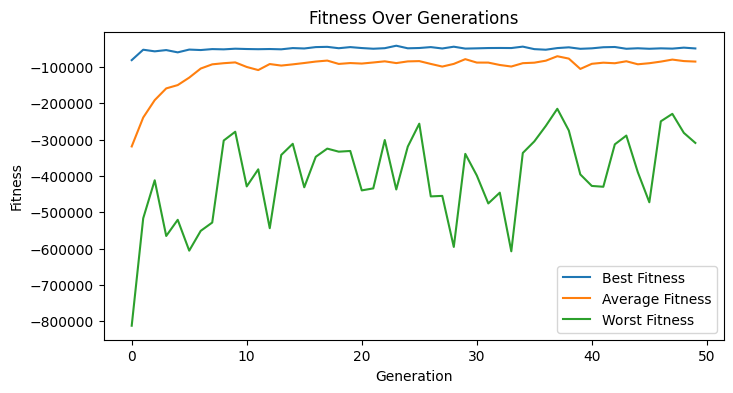

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

neat_metrics = 'outputs/training_log_static.csv'
neat_df = pd.read_csv(neat_metrics)

plt.figure(figsize=(8, 4))

plt.plot(neat_df['Generation'], neat_df['Best Fitness'], label='Best Fitness')
plt.plot(neat_df['Generation'], neat_df['Average Fitness'], label='Average Fitness')
plt.plot(neat_df['Generation'], neat_df['Worst Fitness'], label='Worst Fitness')

plt.xlabel('Generation')
plt.ylabel('Fitness')
plt.title('Fitness Over Generations')
plt.legend()

plt.show()

Unfortunately, the NEAT algorithm did not perform as expected, as it seems like it was more biased in selecting "hard drops" or "spins" as the most optimal move. We do observe however that each genome's neural network does start to learn to avoid random moves to increase its fitness/rewards for the next generation. However, these fitness scores stagnate at -5000 on average. In fact, each generation seems to achieve at most negative rewards as unfortunately failed to achieve a line clear.

Our attempts to address the bias in "hard drops" or "spins" was to heavily penalize the fitness score if there was an increase in holes and non-uniformity in heights (bumpiness). However, there was very miniscule change.

### Subsection 2

Another likely section is if you are doing any feature selection through cross-validation or hand-design/validation of features/transformations of the data

### Subsection 3

Probably you need to describe the base model and demonstrate its performance.  Maybe you include a learning curve to show whether you have enough data to do train/validate/test split or have to go to k-folds or LOOCV or ???

# Discussion

### Interpreting the result

OK, you've given us quite a bit of tech informaiton above, now its time to tell us what to pay attention to in all that.  Think clearly about your results, decide on one main point and 2-4 secondary points you want us to understand. Highlight HOW your results support those points.  You probably want 2-5 sentences per point.

### Limitations

Are there any problems with the work?  For instance would more data change the nature of the problem? Would it be good to explore more hyperparams than you had time for?   

### Ethics & Privacy

This project is meant to be purely an academic exercise. One ethical concern is potentially creating cheating tools for popular online multiplayer games such as tetr.io or Tetris 99. To alleviate these concerns, we are going to make sure that our code only performs as expected with a very specific environment that we create ourselves. As with all other AI created to dominate their specific game, it is important to keep in mind that they are not meant to be used for another player to gain an unfair advantage over the other players. Another concern would be potential copyright infringement. We have no intention to market this game as our own and we will endeavor to keep our work for private, academic use. 

### Conclusion

Reiterate your main point and in just a few sentences tell us how your results support it. Mention how this work would fit in the background/context of other work in this field if you can. Suggest directions for future work if you want to.

# Footnotes
<!-- <a name="lorenznote"></a>1.[^](#lorenz): Lorenz, T. (9 Dec 2021) Birds Aren’t Real, or Are They? Inside a Gen Z Conspiracy Theory. *The New York Times*. https://www.nytimes.com/2021/12/09/technology/birds-arent-real-gen-z-misinformation.html<br>  -->
<a name="chip"></a>1.[^]BBC NEWS. (n.d.). Tetris: A Chip off the Old Bloc. Retrieved May 3, 2024, from http://news.bbc.co.uk/2/hi/uk_news/magazine/3479989.stm<br>

<a name="tetris99"></a>2.[^]Contributors to Wikimedia projects. (2024a, April 8). Tetris 99. Wikipedia. https://en.wikipedia.org/wiki/Tetris_99<br>

<a name="tetriswiki"></a>3.[^] Contributors to Wikimedia projects. (2024b, May 1). Tetris. Wikipedia. https://en.wikipedia.org/wiki/Tetris<br>

<a name="design"></a>4.[^] Kumar, J. M., Herger, M., & Dam, R. F. (2017, January 12). A Game Explained (an example of a single game and how it meets the rules of fun). Interaction Design Foundation. https://www.interaction-design.org/literature/article/a-game-explained-an-example-of-a-single-game-and-how-it-meets-the-rules-of-fun#rules-2<br>

<a name="medium"></a>5.[^] L, R. (2021, October 5). Reinforcement learning on tetris - Rex L. Medium. https://rex-l.medium.com/reinforcement-learning-on-tetris-707f75716c37<br>

<a name="rl"></a>6.[^] Pradhan, S., & Stevens, M. (n.d.). Playing Tetris with Deep Reinforcement Learning. Retrieved May 3, 2024, from https://cs231n.stanford.edu/reports/2016/pdfs/121_Report.pdf<br>

<a name="rl"></a>7.[^] tristanrussell. gym-simpletetris. https://github.com/tristanrussell/gym-simpletetris<br>